In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shutil

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
image_path = "data/PetImages"
image_path

'data/PetImages'

In [32]:
# Check the number of images in each category
for category in os.listdir(image_path):
    print(f"{category}: {len(os.listdir(os.path.join(image_path, category)))}")

Cat: 12491
Dog: 12470
train: 2
validation: 2


In [33]:
# Specify the base directory and categories
base_dir = "data/PetImages"
categories = ["Dog", "Cat"]

In [34]:
# Define paths for train and validation directories
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Create the train and validation directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

# Create subdirectories for each category in train and validation directories
for category in categories:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(validation_dir, category), exist_ok=True)

In [35]:
# splite the data into train and validation

def splite_data(base_dir, train_dir, validation_dir, category, test_size=0.2):
    category_path = os.path.join(base_dir, category)
    images = os.listdir(category_path)
    
    train_filenames, validation_filenames = train_test_split(images, test_size=test_size)
    
    for filename in train_filenames:
        source = os.path.join(category_path, filename)
        destination = os.path.join(train_dir, category, filename)
        shutil.copy(source, destination)
        
    for filename in validation_filenames:
        source = os.path.join(category_path, filename)
        destination = os.path.join(validation_dir, category, filename)
        shutil.copy(source, destination)

In [36]:
# Split the data into train and validation
for category in categories:
    splite_data(base_dir, train_dir, validation_dir, category, test_size=0.2)

In [37]:
# Check the number of images in each category
for category in categories:
    print(f"{category}:")
    print(f"Train: {len(os.listdir(os.path.join(train_dir, category)))}")
    print(f"Validation: {len(os.listdir(os.path.join(validation_dir, category)))}")

Dog:
Train: 12446
Validation: 7367
Cat:
Train: 12468
Validation: 7326


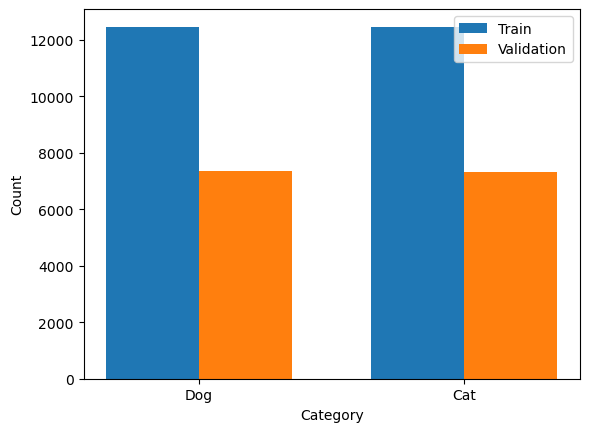

In [38]:
# bar plot of the number of images in each category
train_count = [len(os.listdir(os.path.join(train_dir, category))) for category in categories]
validation_count = [len(os.listdir(os.path.join(validation_dir, category))) for category in categories]

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(categories))

train_bar = ax.bar(index, train_count, bar_width, label="Train")
validation_bar = ax.bar(index + bar_width, validation_count, bar_width, label="Validation")

ax.set_xlabel("Category")
ax.set_ylabel("Count")

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(categories)

ax.legend()
plt.show()